In [76]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from mlxtend.classifier import StackingCVClassifier
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Loading the data set into a pandas data frame

df=pd.read_csv('Train-Test-Telco-Customer-Retention.csv')

print(os.listdir("./"))

['data_preprocess.ipynb', '.DS_Store', 'LICENSE', 'NewData-Telco-Customer-Retention.csv', 'data_clean.ipynb', 'data_prep_test1.ipynb', 'Train-Test-Telco-Customer-Retention.csv', 'README.md', '.gitignore', '.git', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7000 non-null   object 
 1   gender            7000 non-null   object 
 2   SeniorCitizen     7000 non-null   int64  
 3   Partner           7000 non-null   object 
 4   Dependents        7000 non-null   object 
 5   tenure            7000 non-null   int64  
 6   PhoneService      7000 non-null   object 
 7   MultipleLines     7000 non-null   object 
 8   InternetService   7000 non-null   object 
 9   OnlineSecurity    7000 non-null   object 
 10  OnlineBackup      7000 non-null   object 
 11  DeviceProtection  7000 non-null   object 
 12  TechSupport       7000 non-null   object 
 13  StreamingTV       7000 non-null   object 
 14  StreamingMovies   7000 non-null   object 
 15  Contract          7000 non-null   object 
 16  PaperlessBilling  7000 non-null   object 


In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [80]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
# Checking the unique values

for col in df:
    print('\n',col,': ', df[col].unique())


 customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 gender :  ['Female' 'Male']

 SeniorCitizen :  [0 1]

 Partner :  ['Yes' 'No']

 Dependents :  ['No' 'Yes']

 tenure :  [ 1 34  2 45 28 62 13 16 58 49 25 69 52 71 10 21 12 30 47 72 17 27  5 46
 11 70 63 43 15  8 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32
 55 37 36 41  6  4 33 67 23 57 61 14 22 20 53 40 59 24 44 19 54 51 26 39
  0]

 PhoneService :  ['No' 'Yes']

 MultipleLines :  ['No phone service' 'No' 'Yes']

 InternetService :  ['DSL' 'Fiber optic' 'No']

 OnlineSecurity :  ['No' 'Yes' 'No internet service']

 OnlineBackup :  ['Yes' 'No' 'No internet service']

 DeviceProtection :  ['No' 'Yes' 'No internet service']

 TechSupport :  ['No' 'Yes' 'No internet service']

 StreamingTV :  ['No' 'Yes' 'No internet service']

 StreamingMovies :  ['No' 'Yes' 'No internet service']

 Contract :  ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling :  ['Yes' 'No']

 Paymen

In [82]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.162286,32.380143,64.769650,2280.794143
std,0.368739,24.552819,30.088425,2266.933457
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.550000,398.550000
50%,0.000000,29.000000,70.350000,1395.525000
75%,0.000000,55.000000,89.850000,3782.800000
max,1.000000,72.000000,118.750000,8684.800000


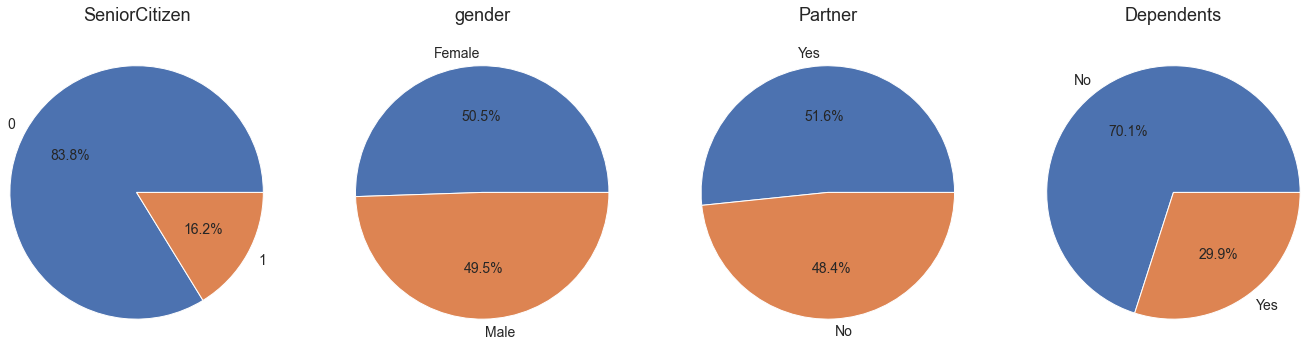

In [83]:
# Illustrating the values and count of attributes using plots:

label_SenCit = df['SeniorCitizen'].unique()
value_SenCit = df['SeniorCitizen'].value_counts() / len(df) * 100

label_gen = df['gender'].unique()
value_gen = df['gender'].value_counts() / len(df) * 100

label_Part = df['Partner'].unique()
value_Part = df['Partner'].value_counts() / len(df) * 100

label_Dep = df['Dependents'].unique()
value_Dep = df['Dependents'].value_counts() / len(df) * 100

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.5, 0.5], aspect=2)
ax1.pie(value_SenCit, textprops={'size': 14}, autopct='%1.1f%%', labels=label_SenCit, radius = 2.2)

ax2 = fig.add_axes([0.8, 0, 0.5, 0.5], aspect=2)
ax2.pie(value_gen, textprops={'size': 14}, autopct='%1.1f%%', labels=label_gen, radius = 2.2)

ax3 = fig.add_axes([1.6, 0, 0.5, 0.5], aspect=2)
ax3.pie(value_Part, textprops={'size': 14}, autopct='%1.1f%%', labels=label_Part, radius = 2.2)

ax4 = fig.add_axes([2.4, 0, 0.5, 0.5], aspect=2)
ax4.pie(value_Dep, textprops={'size': 14}, autopct='%1.1f%%', labels=label_Dep, radius = 2.2)

ax1.set_title('SeniorCitizen', loc='center', pad = 100, fontdict={'fontsize':18})
ax2.set_title('gender', loc='center', pad = 100, fontdict={'fontsize':18})
ax3.set_title('Partner', loc='center', pad = 100, fontdict={'fontsize':18})
ax4.set_title('Dependents', loc='center', pad = 100, fontdict={'fontsize':18})

plt.show()

<AxesSubplot:>

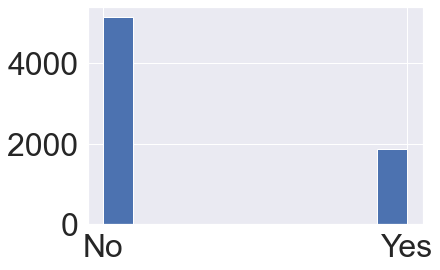

In [84]:
df['Churn'].hist()

In [85]:
# scatter_matrix(df,alpha=0.2, figsize=(10, 10))

In [86]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 32.0,
 'axes.titlesize': 32.0,
 'xtick.labelsize': 32.0,
 'ytick.labelsize': 32.0,
 'legend.fontsize': 32.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0,
 'legend.title_fontsize': 12.0}

In [87]:
rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32, 'legend.fontsize': 32,}

In [88]:
sns.set(rc=rc)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

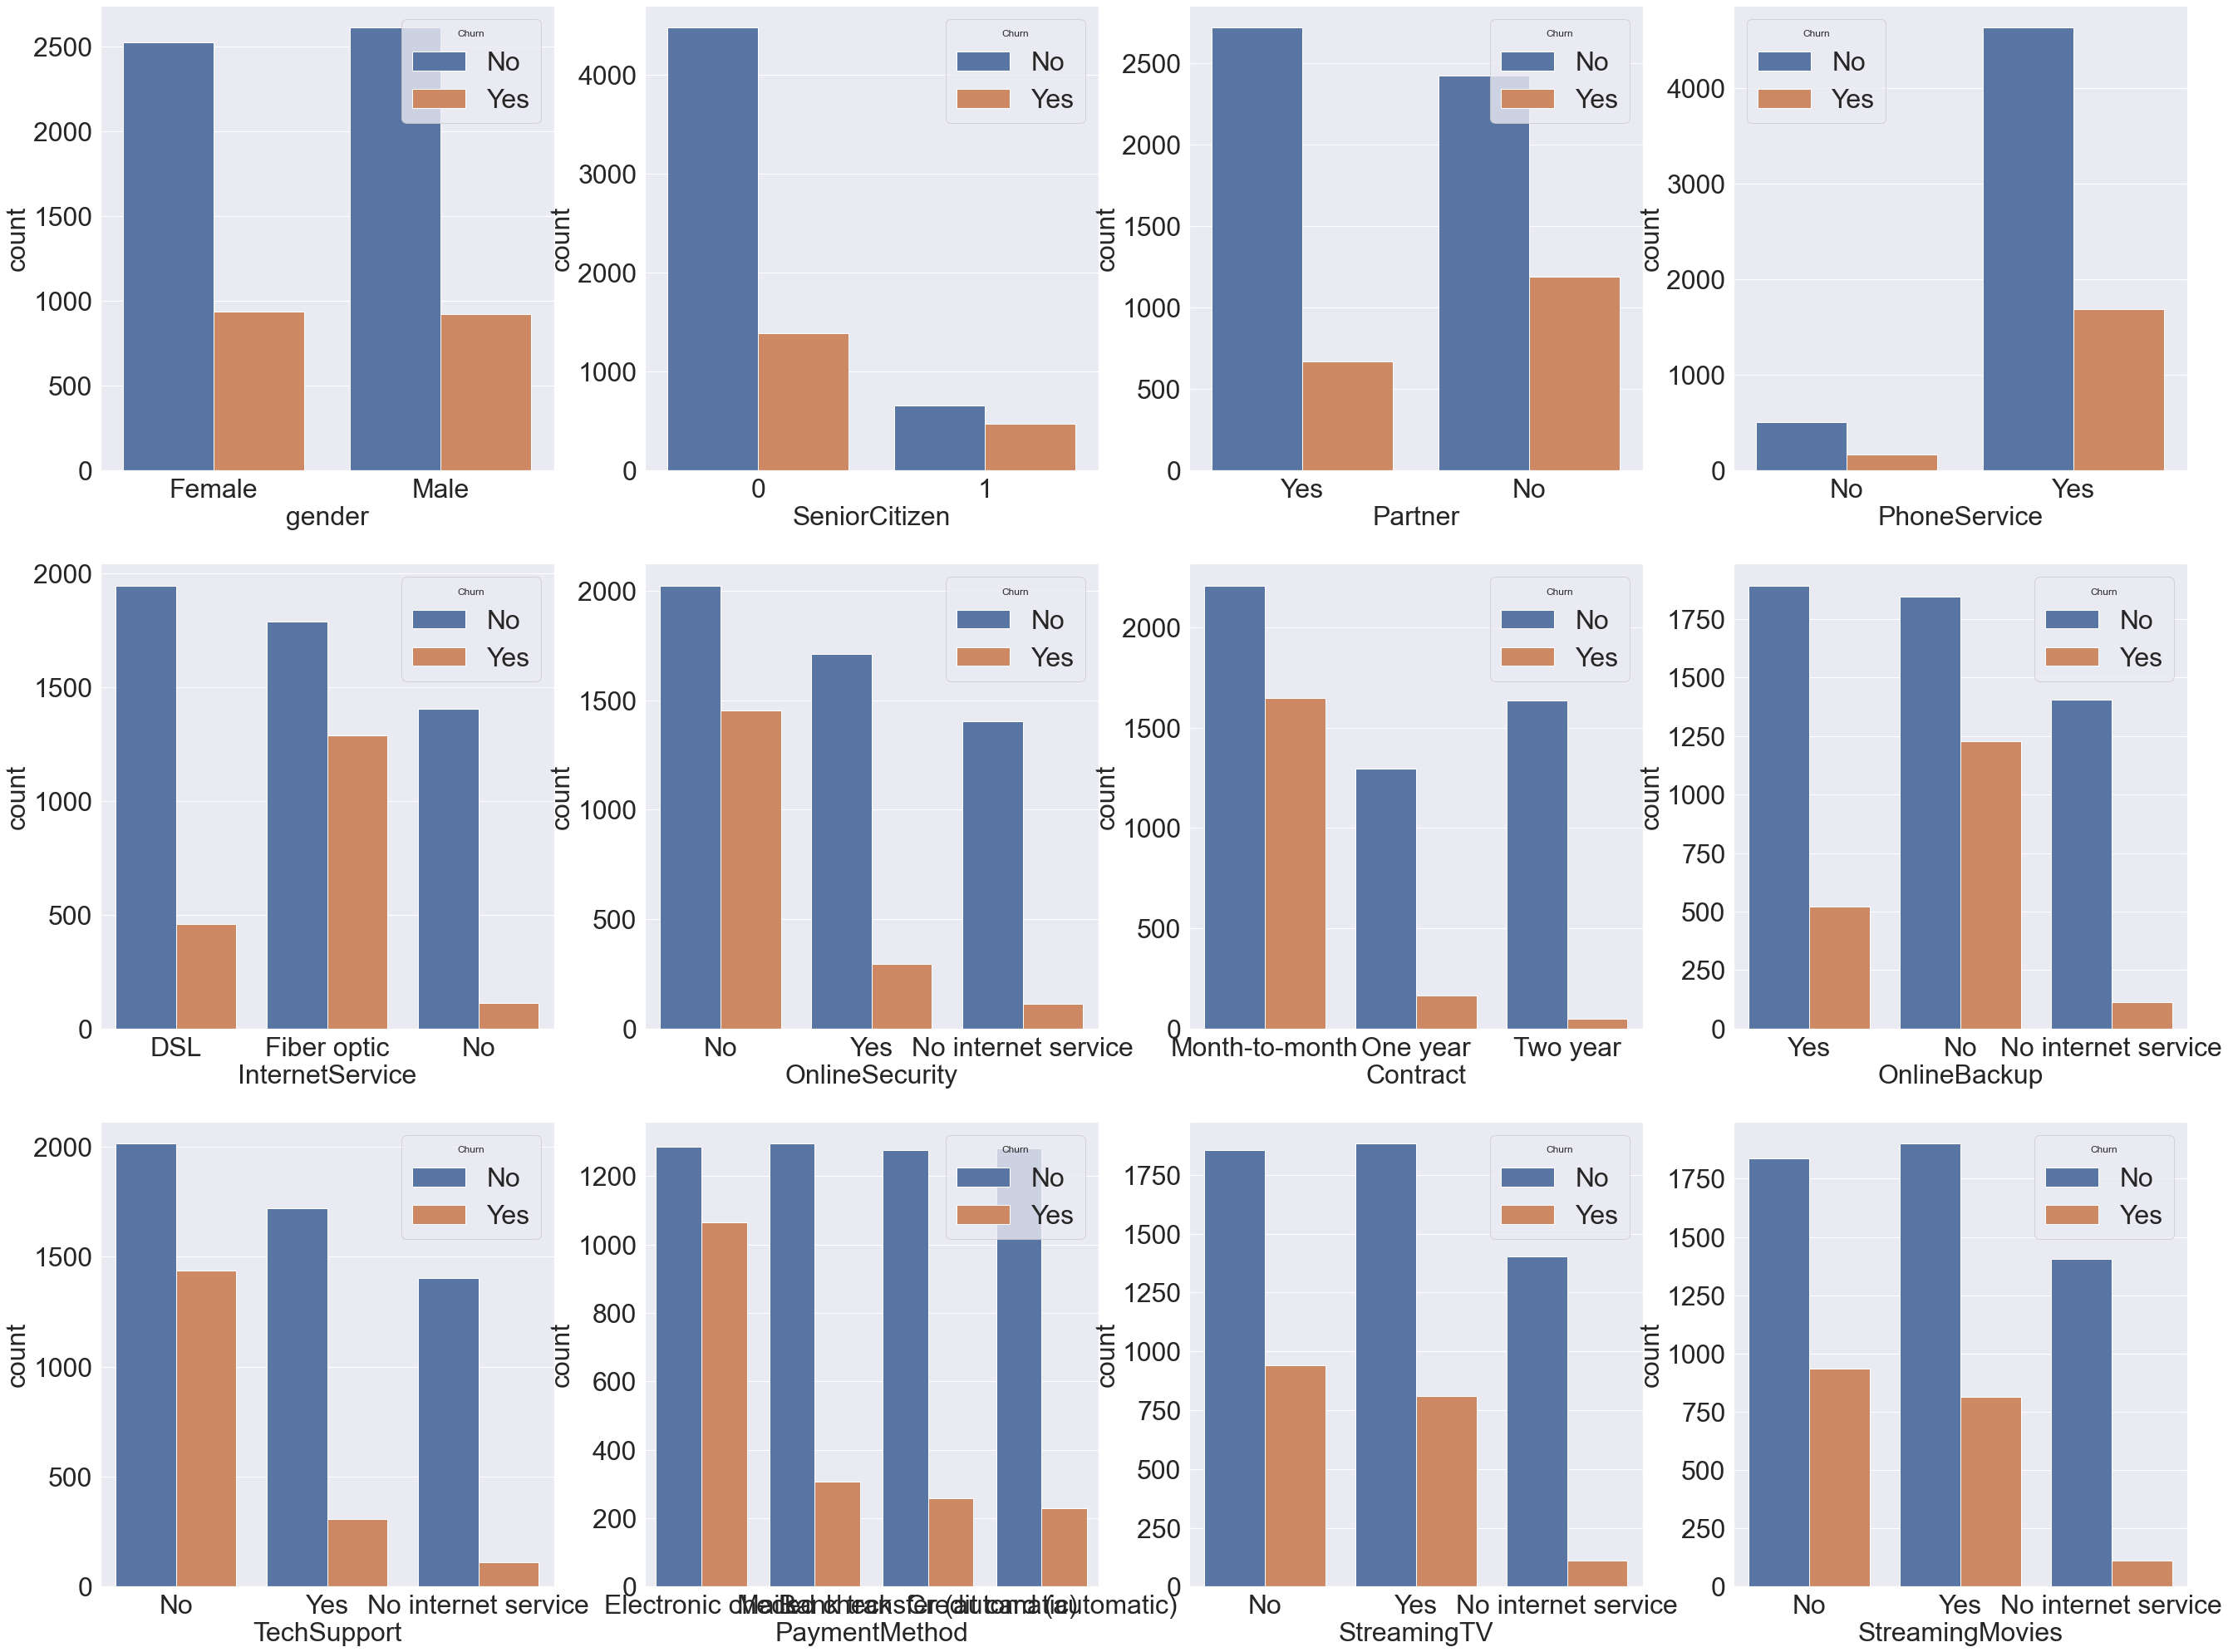

In [89]:
fig, axes = plt.subplots(nrows = 3,ncols = 4,figsize = (45,35))
sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0][0] )
sns.countplot(x="SeniorCitizen", hue="Churn", data=df,ax=axes[0][1] )
sns.countplot(x="Partner", hue="Churn", data=df,ax=axes[0][2] ) 
sns.countplot(x="PhoneService", hue="Churn", data=df,ax=axes[0][3] )

sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[1][0] )
sns.countplot(x="OnlineSecurity", hue="Churn", data=df,ax=axes[1][1] )
sns.countplot(x="Contract", hue="Churn", data=df,ax=axes[1][2] ) 
sns.countplot(x="OnlineBackup", hue="Churn", data=df,ax=axes[1][3] )


sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[2][0] )
sns.countplot(x="PaymentMethod", hue="Churn", data=df,ax=axes[2][1] )
sns.countplot(x="StreamingTV", hue="Churn", data=df,ax=axes[2][2] ) 
sns.countplot(x="StreamingMovies", hue="Churn", data=df,ax=axes[2][3] )

In [90]:
#Feature Selection (using statistic test)
categorical_features=['gender','Partner','Dependents','PhoneService',  
                        'MultipleLines' ,'InternetService','OnlineSecurity','OnlineBackup',
                        'DeviceProtection','TechSupport', 'StreamingTV' ,'StreamingMovies' ,
                        'Contract','PaperlessBilling','PaymentMethod']

In [91]:
# Statistical Test to determine whether input features are relevant to the outcome to be predicted.
# P-value <= 0.05 significant result
# P-value > 0.05 not significant result
# A p-value is a measure of the probability that an observed difference could have occurred just by random chance. The lower the p-value, the greater the statistical significance of the observed difference.
statistical_significance=[]
for attr in categorical_features:
    data_count=pd.crosstab(df[attr],df["Churn"])
    #print(data_count)
    obs=data_count.values
    #print(obs)
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,4)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance)


,Attribute,P-value
0,gender,0.4067
1,Partner,0.0000
2,Dependents,0.0000
3,PhoneService,0.3901
4,MultipleLines,0.0029
5,InternetService,0.0000
6,OnlineSecurity,0.0000
7,OnlineBackup,0.0000
8,DeviceProtection,0.0000
9,TechSupport,0.0000


In [92]:
# We drop the non siginificant features (P-value>0.05)¶
df=df.drop(['gender','PhoneService'],axis=1)

In [94]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,7892-POOKP,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [95]:
data=df

In [96]:
data.Churn=data.Churn.replace('Yes','1')
data.Churn=data.Churn.replace('No','0')
print('churn :\n',data.Churn.value_counts())
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
print('Partner : \n ',data['Partner'].value_counts())

data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0) 
print('Dependents :\n',data.Dependents.value_counts())

data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0) 
print('PaperlessBilling :\n',data.PaperlessBilling.value_counts())

#data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
#print('PhoneService :\n',data.PhoneService.value_counts())


data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
print('MultipleLines :\n',data.MultipleLines.value_counts())

data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
print('Online Backup :\n',data.OnlineBackup.value_counts())


data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
print('Online Security :\n',data.OnlineSecurity.value_counts())


data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
print('DeviceProtection :\n',data.DeviceProtection.value_counts())

data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
print('Tech Support :\n',data.TechSupport.value_counts())


data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
print('StreamingTV  :\n',data.StreamingTV.value_counts())

data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)
print('StreamingMovies  :\n',data.StreamingMovies.value_counts())

churn :
 0    5140
1    1860
Name: Churn, dtype: int64
Partner : 
  0    3614
1    3386
Name: Partner, dtype: int64
Dependents :
 0    4904
1    2096
Name: Dependents, dtype: int64
PaperlessBilling :
 1    4143
0    2857
Name: PaperlessBilling, dtype: int64
MultipleLines :
 0    4047
1    2953
Name: MultipleLines, dtype: int64
Online Backup :
 0    4588
1    2412
Name: OnlineBackup, dtype: int64
Online Security :
 0    4993
1    2007
Name: OnlineSecurity, dtype: int64
DeviceProtection :
 0    4589
1    2411
Name: DeviceProtection, dtype: int64
Tech Support :
 0    4969
1    2031
Name: TechSupport, dtype: int64
StreamingTV  :
 0    4310
1    2690
Name: StreamingTV, dtype: int64
StreamingMovies  :
 0    4286
1    2714
Name: StreamingMovies, dtype: int64


In [97]:
#encoding
data_dummied = pd.get_dummies(data,columns=['PaymentMethod','Contract','InternetService'])

In [98]:
data_dummied['TotalCharges']=data_dummied['TotalCharges'].fillna(data_dummied['TotalCharges'].mean())

In [99]:
#normalization
min_max_scaler = MinMaxScaler()
numeric_columns=['tenure','MonthlyCharges','TotalCharges']
data_dummied[numeric_columns]=min_max_scaler.fit_transform(data_dummied[numeric_columns])

In [100]:
data_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7000 non-null   object 
 1   SeniorCitizen                            7000 non-null   int64  
 2   Partner                                  7000 non-null   int64  
 3   Dependents                               7000 non-null   int64  
 4   tenure                                   7000 non-null   float64
 5   MultipleLines                            7000 non-null   int64  
 6   OnlineSecurity                           7000 non-null   int64  
 7   OnlineBackup                             7000 non-null   int64  
 8   DeviceProtection                         7000 non-null   int64  
 9   TechSupport                              7000 non-null   int64  
 10  StreamingTV                              7000 no

In [101]:
data_dummied=data_dummied.drop('customerID',axis=1)

In [102]:
#Train/Test split
Y=data_dummied['Churn']
X=data_dummied.drop(['Churn'],axis=1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X, Y, test_size=0.10, random_state=5,shuffle=True,stratify=Y)

In [109]:
rc={'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0,
 'legend.title_fontsize': None}

In [110]:
sns.set(rc=rc)

<AxesSubplot:>

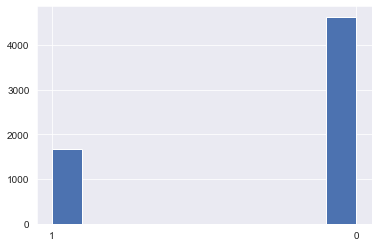

In [111]:
y_train.hist()

<AxesSubplot:>

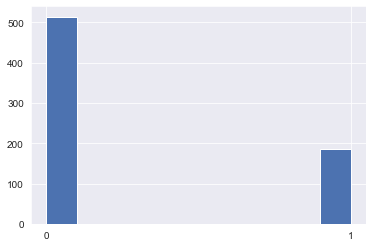

In [112]:
y_test.hist()

<AxesSubplot:>

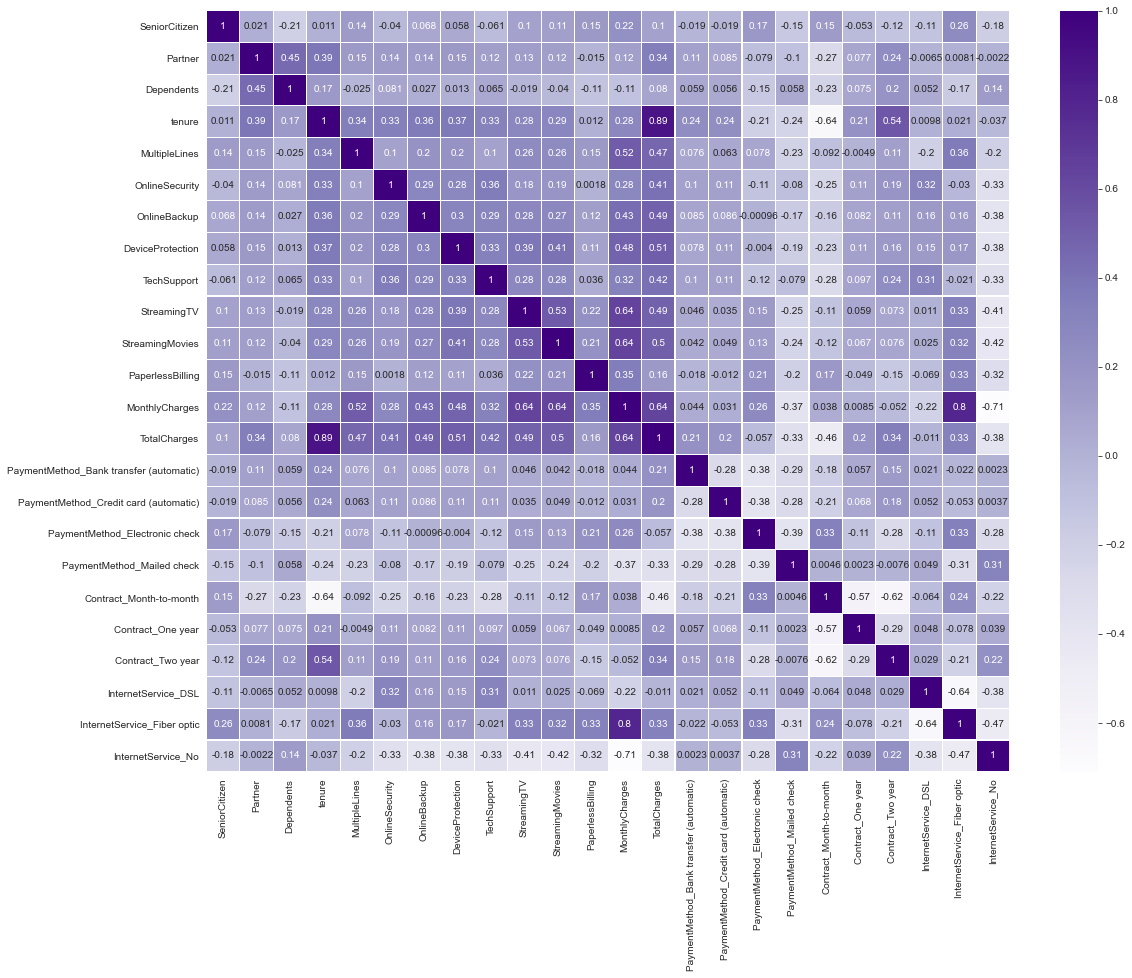

In [113]:
# check the correlation between the attributes
fig,axe = plt.subplots(figsize = (18,14))
sns.heatmap(X_train.corr(method='spearman'), cmap ="Purples", linewidths = 0.1, annot=True,ax=axe)

In [116]:
y_test.dtypes

dtype('O')

In [117]:
#Changing the target type from str to int
y_test=y_test.astype(str).astype(int)
y_train=y_train.astype(str).astype(int)

In [118]:
y_test.dtypes

dtype('int64')

In [119]:
#cross validation
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [124]:
from sklearn.utils import class_weight

In [125]:
class_weight1=int(y_train.value_counts()[0]/y_train.value_counts()[1])
class_weight1

2

In [126]:
# from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [127]:
#Modeling
#Test Different algorithms and Pick the 5 best ones
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(ExtraTreesClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state,class_weight=class_weights))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state,class_weight=class_weights))

In [128]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))

   CrossValMeans  CrossValerrors           Algorithm
0       0.825901        0.012143                 SVC
1       0.656494        0.013096        DecisionTree
2       0.753302        0.010572            AdaBoost
3       0.823437        0.008285        RandomForest
4       0.798149        0.009136          ExtraTrees
5       0.846705        0.015363    GradientBoosting
6       0.825495        0.013683             Xgboost
7       0.778657        0.010701         KNeighboors
8       0.845190        0.013992  LogisticRegression


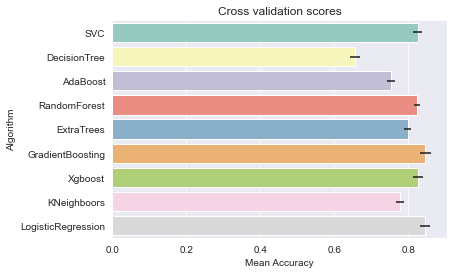

In [129]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [131]:
# Evaluation function
def evaluation(model,x_test,y_test):
    print("Test AUC:",roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print('Train AU  :',roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    #print(roc_auc_score(y_test, y_pred))
    axe.set_xlabel('Actual')
    axe.set_ylabel('Predicted')

In [134]:
#Hyperparameter tuning
#GradientBoosting
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                 
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              
              }
gsGBC=RandomizedSearchCV(estimator=GBC,param_distributions=gb_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)
 

gsGBC.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'loss': ['deviance'],
                                        'max_depth': [4, 8],
                                        'min_samples_leaf': [100, 150],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, scoring='roc_auc')

In [136]:
GBC_best = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_)

0.8472364185047756


In [137]:
evaluation(GBC_best ,X_test,y_test)

Test AUC: 0.8415285971298272
Train AU  : 0.871702253276246


In [138]:
#RandomForrest
RFC = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))
#class_weight_dict = )
#
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   19.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.6809338521400778,
                                                            1: 1.881720430107527}),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [139]:
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

0.8457950943922796

In [140]:
evaluation(RFC_best,X_test,y_test)

Test AUC: 0.8382808250700807
Train AU  : 0.9230840850194294


In [141]:
# SVM
SVMC = SVC(probability=True,class_weight=dict(enumerate(class_weights)))
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 100,200]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(class_weight={0: 0.6809338521400778,
                                         1: 1.881720430107527},
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 10, 100, 200], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=1)

In [142]:
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

0.8410151047649469

In [143]:
evaluation(gsSVMC,X_test,y_test)

Test AUC: 0.8315394753357601
Train AU  : 0.844806973828772


In [144]:
# XGBOOST
class_weight=int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [145]:
XGBoost=xgboost.XGBClassifier(scale_pos_weight=class_weight)
xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}
gsXGoost=RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)


gsXGoost.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=Non...
                                           reg_lambda=None, scale_pos_weight=2,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                          

In [146]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.8496328097241073

In [147]:
evaluation(XGBOOST_best,X_test,y_test)

Test AUC: 0.8424019915484708
Train AU  : 0.862398120126179


In [148]:
# LogisticRegression
logreg = LogisticRegression(class_weight=dict(enumerate(class_weights)))
logreg_param_grid={
    'C':[100, 10, 1.0, 0.1, 0.01] ,
    'penalty':['l2']
}
gslogreg=GridSearchCV(logreg,param_grid = logreg_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)
gslogreg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.6809338521400778,
                                                        1: 1.881720430107527}),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2']},
             scoring='roc_auc', verbose=1)

In [149]:
LogReg_best = gslogreg.best_estimator_

# Best score
gslogreg.best_score_

0.8458006107969428

In [150]:
evaluation(LogReg_best,X_test,y_test)

Test AUC: 0.8403309484958789
Train AU  : 0.8491121555428489


In [151]:
# Trying the voting ensemble method and see the results
votingC = VotingClassifier(estimators=[('gbc',GBC_best), ('rfc', RFC_best),
('xgboost',XGBOOST_best),('logreg',LogReg_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [152]:
evaluation(votingC,X_test,y_test)

Test AUC: 0.8431655579264465
Train AU  : 0.8820299631039767


In [153]:
# Trying The stacking ensembling method on different combinaisons
scv=StackingCVClassifier(classifiers=[GBC_best,RFC_best,XGBOOST_best,LogReg_best],meta_classifier= XGBOOST_best,random_state=42)

In [154]:
scv2=StackingCVClassifier(classifiers=[GBC_best,RFC_best,XGBOOST_best,LogReg_best],meta_classifier= RFC_best,random_state=42)


In [155]:
scv3=StackingCVClassifier(classifiers=[RFC_best,XGBOOST_best,LogReg_best,SVMC_best],meta_classifier= RFC_best,random_state=42)

In [156]:
scv.fit(X_train,y_train)
evaluation(scv,X_test,y_test)

Test AUC: 0.8115037027739426
Train AU  : 0.8446952087856234


In [157]:
scv3.fit(X_train,y_train)
evaluation(scv3,X_test,y_test)

Test AUC: 0.7953694406091796
Train AU  : 0.8333042782961196


In [158]:
scv2.fit(X_train,y_train)
evaluation(scv2,X_test,y_test)

Test AUC: 0.8095947868290031
Train AU  : 0.8466066428337882


In [159]:
scv4=StackingCVClassifier(cv=2,classifiers=[RFC_best,SVMC_best,XGBOOST_best,LogReg_best],meta_classifier= GBC_best,random_state=42)

In [160]:
scv4.fit(X_train,y_train)
evaluation(scv4,X_test,y_test)

Test AUC: 0.7964834107359524
Train AU  : 0.8317369204553144


In [161]:
# Final decision and save the best model
# the model generated by the voting method was the best performant
import pickle
pickle.dump(votingC, open("best_model_Votingg", 'wb'))